In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [56]:
#Load Data
df = pd.read_csv('/content/content/framingham penyakit hati.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [57]:
#Identifikasi data
df.info() #Memeriksa Tipe Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [58]:
df = df.dropna()

In [59]:
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
#cleaning data
df.drop_duplicates(inplace=True) #Menghapus Data Duplikat

In [62]:
print("Jumlah Duplikasi : ", df.duplicated().sum()) #Melihat Jumlah Duplikasi Data

Jumlah Duplikasi :  0


In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [64]:
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)


In [65]:
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('dt', dt),
    ('lr', lr)],
    voting='hard')

In [66]:
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

In [67]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Akurasi:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.46      0.05      0.09       122

    accuracy                           0.83       732
   macro avg       0.65      0.52      0.50       732
weighted avg       0.78      0.83      0.77       732

Akurasi: 0.8319672131147541


Kesimpulan:
Random Forest adalah model dengan akurasi terbaik yaitu 100%
area dibawah kurva ROC yaitu 100%

<ipython-input-70-fe2ebcf0a97a>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='navy')


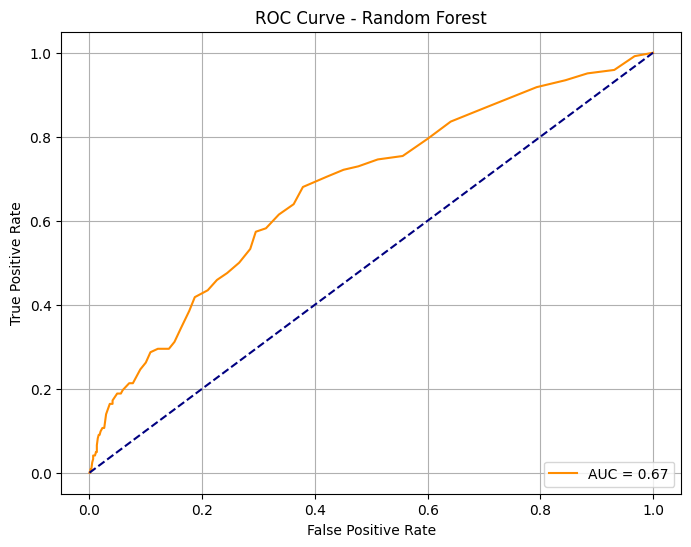

In [70]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/content/framingham penyakit hati.csv')  # Ubah path jika perlu
df = df.dropna()

# Pisahkan fitur dan target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Prediksi probabilitas
y_prob = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


<ipython-input-71-ad9a783dcbfd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features, palette="viridis")


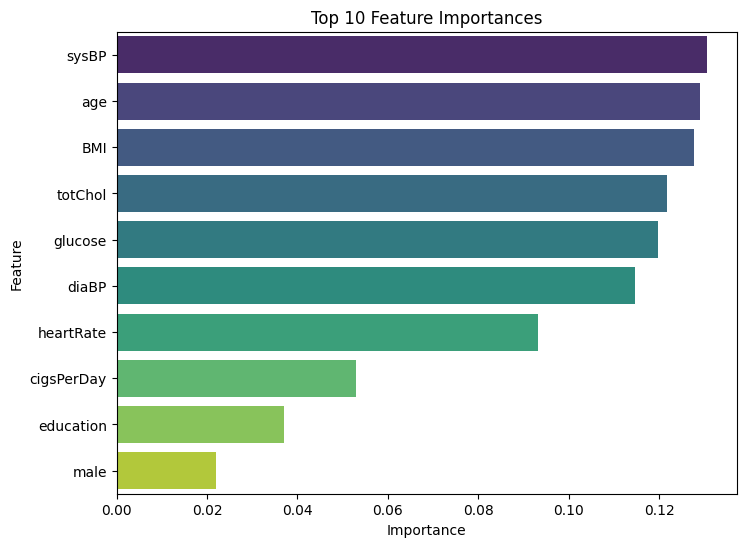

In [71]:
import seaborn as sns
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[-10:][::-1]
features = X.columns[indices]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=features, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


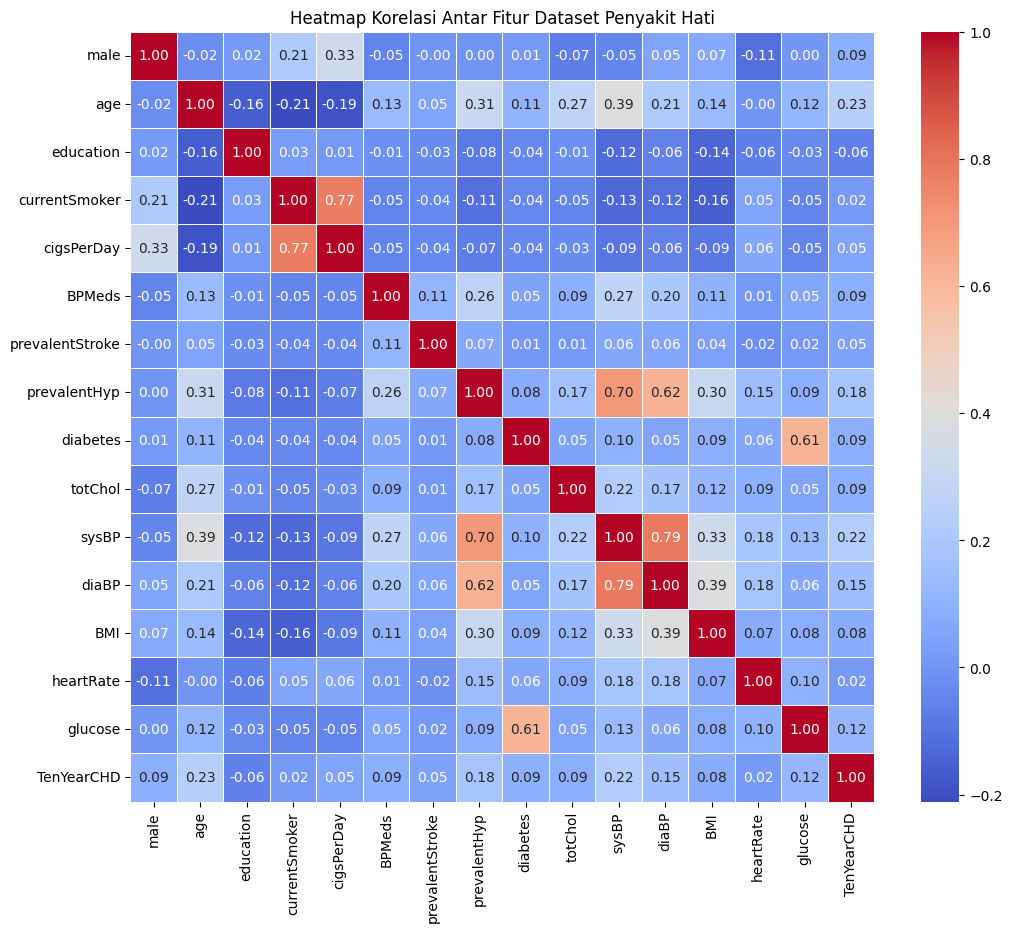

In [73]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dan bersihkan dataset (jika belum dilakukan)
df = pd.read_csv('/content/content/framingham penyakit hati.csv')  # Ubah sesuai path kamu
df = df.dropna()  # pastikan data tidak memiliki nilai kosong

# Buat Heatmap Korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Dataset Penyakit Hati")
plt.show()

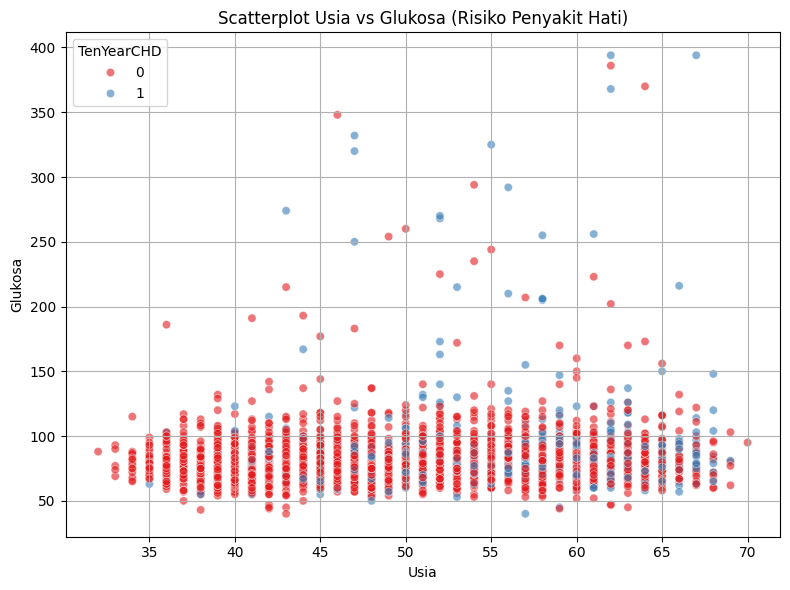

In [76]:
# Import library jika belum
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dan bersihkan data (jika belum dilakukan)
df = pd.read_csv('/content/content/framingham penyakit hati.csv')  # Ubah path jika perlu
df = df.dropna()  # Hapus data kosong

# Buat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="age", y="glucose", hue="TenYearCHD", alpha=0.6, palette="Set1")
plt.title("Scatterplot Usia vs Glukosa (Risiko Penyakit Hati)")
plt.xlabel("Usia")
plt.ylabel("Glukosa")
plt.grid(True)
plt.tight_layout()
plt.show()
